# Business Context


Understanding the business context is essential for guiding the data science efforts towards generating actionable insights that support the overall goals of improving the Airbnb experience in Seattle. This involves identifying the key factors that influence rental success and providing hosts with data-driven recommendations to enhance their listings and attract more guests.

**Market Demand and Trends:**

- What are the busiest times of the year for Airbnb bookings in Seattle?
- How do customer reviews vary across different neighbourhoods in Seattle?
- How does pricing fluctuate across the different Top30 neighbourhoods during this time period?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')
reviews = pd.read_csv('reviews.csv')

In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
print(listings.dtypes)

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object


In [5]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
print(calendar.dtypes)

listing_id     int64
date          object
available     object
price         object
dtype: object


In [7]:
# Count the number of empty rows in the 'price' column
empty_price_count = calendar['price'].isna().sum()

print(f"The number of empty rows in the 'price' column is {empty_price_count}.")

The number of empty rows in the 'price' column is 459028.


In [8]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [9]:
print(reviews.dtypes)

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object


#### DF.describe

The df.describe() provides a summary of the dispersion and shape of a dataset’s distribution, this excludes NaN values. It includes the following:

- Count: The number of non-null entries.
- Mean: The average value.
- Standard Deviation (std): The spread of the data.
- Minimum (min): The smallest value.
- 25th percentile (25%): The value below which 25% of the data falls.
- 50th percentile (50%): The median value.
- 75th percentile (75%): The value below which 75% of the data falls.
- Maximum (max): The largest value.

In [10]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [11]:
calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [12]:
reviews.describe()

,listing_id,id,reviewer_id
count,8.484900e+04,8.484900e+04,8.484900e+04
mean,3.005067e+06,3.058765e+07,1.701301e+07
std,2.472877e+06,1.636613e+07,1.353704e+07
min,4.291000e+03,3.721000e+03,1.500000e+01
25%,7.946330e+05,1.725127e+07,5.053141e+06
50%,2.488228e+06,3.228809e+07,1.413476e+07
75%,4.694479e+06,4.457648e+07,2.762402e+07
max,1.024814e+07,5.873651e+07,5.281274e+07


## 2. Data Cleaning
- Handle missing data.
- Convert price to numeric.

In [13]:
# Prepare data
# Handle missing data
listings.fillna({'neighbourhood': 'Unknown', 'price': 0}, inplace=True)
calendar.fillna({'available': 'f', 'price': 0}, inplace=True)
reviews.fillna({'comments': ''}, inplace=True)

# Convert price to numeric
listings['price'] = listings['price'].replace(r'[\$,]', '', regex=True).astype(float)
calendar['price'] = calendar['price'].replace(r'[\$,]', '', regex=True).astype(float)


I have used **fillna** to preserve the data because it can meaningfully fill the missing values.

I had reservations on using **dropna** I believed the missing data was significant to drop.


In the context of the Seattle Airbnb Open Data, using fillna helps maintain the dataset's integrity and ensures that the analysis can proceed without losing valuable information.

## 3. Data Visualization
- Distribution of prices.
- Distribution of listings by neighborhood.
- Average price by neighborhood.
- Number of reviews per listing.
- Review scores distribution.

In [14]:
# 1. Listings Data Overview
print("Listings Data Overview:")
print(listings.info())
print(listings.describe())


Listings Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-nu

In [15]:
# 2. Calendar Data Overview
print("\nCalendar Data Overview:")
print(calendar.info())
print(calendar.describe())


Calendar Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   listing_id  1393570 non-null  int64  
 1   date        1393570 non-null  object 
 2   available   1393570 non-null  object 
 3   price       1393570 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 42.5+ MB
None
         listing_id         price
count  1.393570e+06  1.393570e+06
mean   5.550111e+06  9.250720e+01
std    2.962274e+06  1.077295e+02
min    3.335000e+03  0.000000e+00
25%    3.258213e+06  0.000000e+00
50%    6.118244e+06  7.500000e+01
75%    8.035212e+06  1.300000e+02
max    1.034016e+07  1.650000e+03


In [16]:
# 3. Reviews Data Overview
print("\nReviews Data Overview:")
print(reviews.info())
print(reviews.describe())


Reviews Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84849 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB
None
         listing_id            id   reviewer_id
count  8.484900e+04  8.484900e+04  8.484900e+04
mean   3.005067e+06  3.058765e+07  1.701301e+07
std    2.472877e+06  1.636613e+07  1.353704e+07
min    4.291000e+03  3.721000e+03  1.500000e+01
25%    7.946330e+05  1.725127e+07  5.053141e+06
50%    2.488228e+06  3.228809e+07  1.413476e+07
75%    4.694479e+06  4.457648e+07  2.762402e+07
max    1.024814e+07  5.873651e+07  5.281274e+07


### Distribution of Prices: Shows the distribution of listing prices.

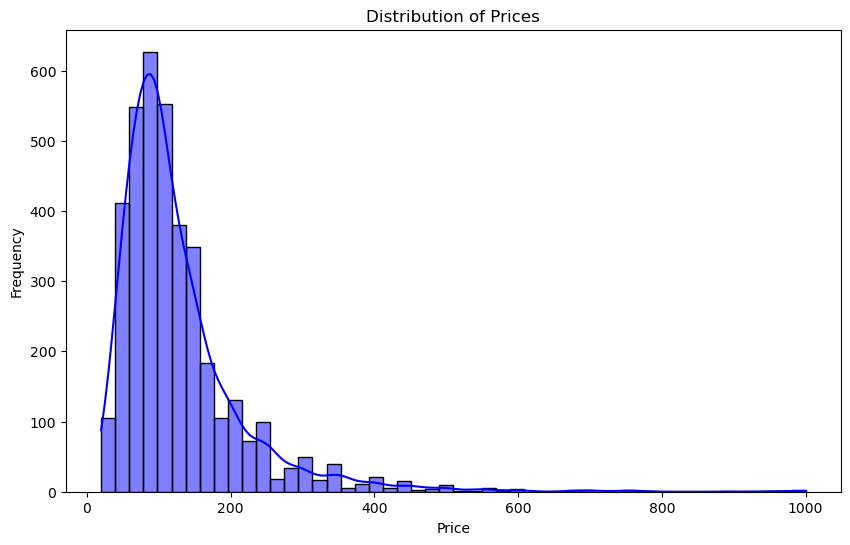

In [17]:
# 4. Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(listings['price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### Distribution of Listings by Neighborhood: Displays the number of listings in each neighborhood.

C:\Users\molem003\AppData\Local\Temp\ipykernel_24596\2733987483.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='neighbourhood', data=top30_listings, order=top30_neighbourhoods, palette='viridis')


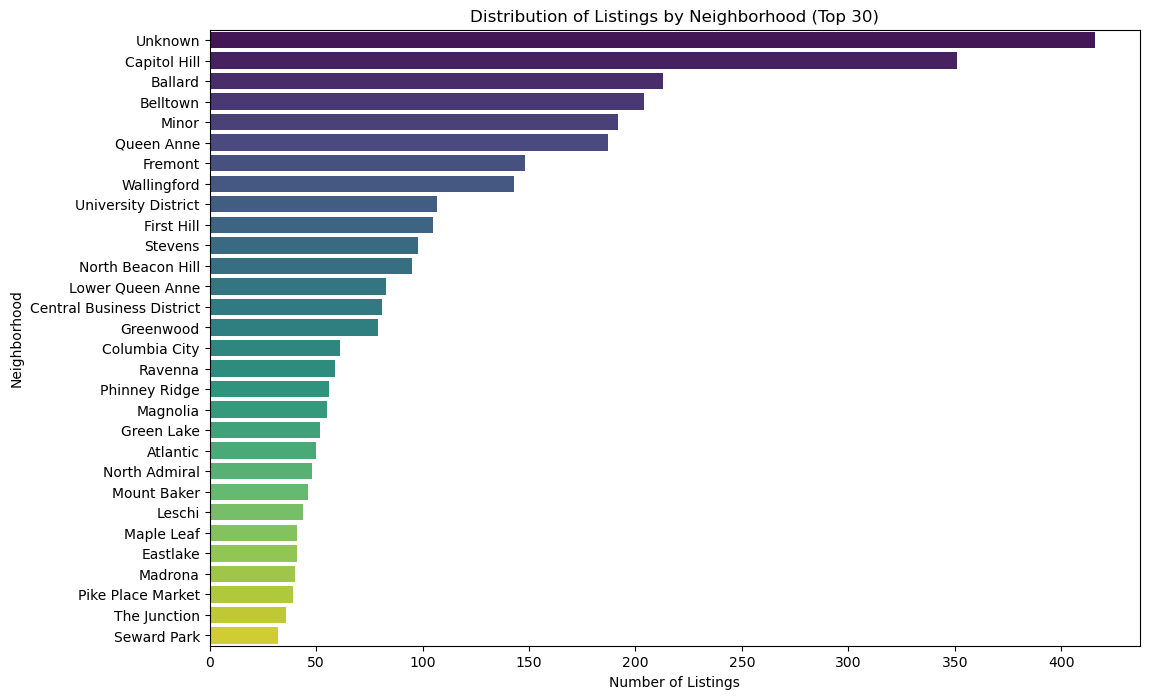

In [29]:

# Assuming 'listings' is a DataFrame containing the listings data
# Get the top 30 neighborhoods by number of listings
top30_neighbourhoods = listings['neighbourhood'].value_counts().head(30).index

# Filter the listings to include only the top 30 neighborhoods
top30_listings = listings[listings['neighbourhood'].isin(top30_neighbourhoods)]

# Plot the distribution of listings by neighborhood for the top 30 neighborhoods
plt.figure(figsize=(12, 8))
sns.countplot(y='neighbourhood', data=top30_listings, order=top30_neighbourhoods, palette='viridis')
plt.title('Distribution of Listings by Neighborhood (Top 30)')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show()

#### Average Price by Neighborhood: Highlights the average price of listings in the top 10 neighborhoods.

C:\Users\molem003\AppData\Local\Temp\ipykernel_24596\2491153868.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_neighborhood.values, y=avg_price_neighborhood.index, palette='viridis')


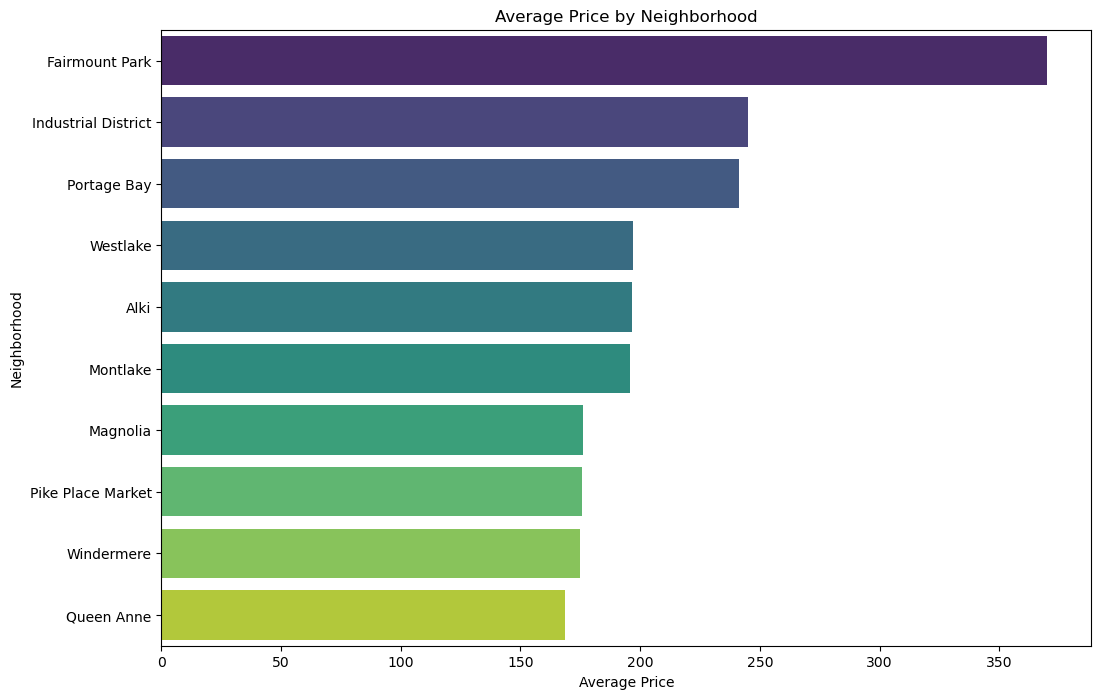

In [19]:
avg_price_neighborhood = listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_price_neighborhood.values, y=avg_price_neighborhood.index, palette='viridis')
plt.title('Average Price by Neighborhood')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()

#### Number of Reviews per Listing: Shows the distribution of the number of reviews per listing.

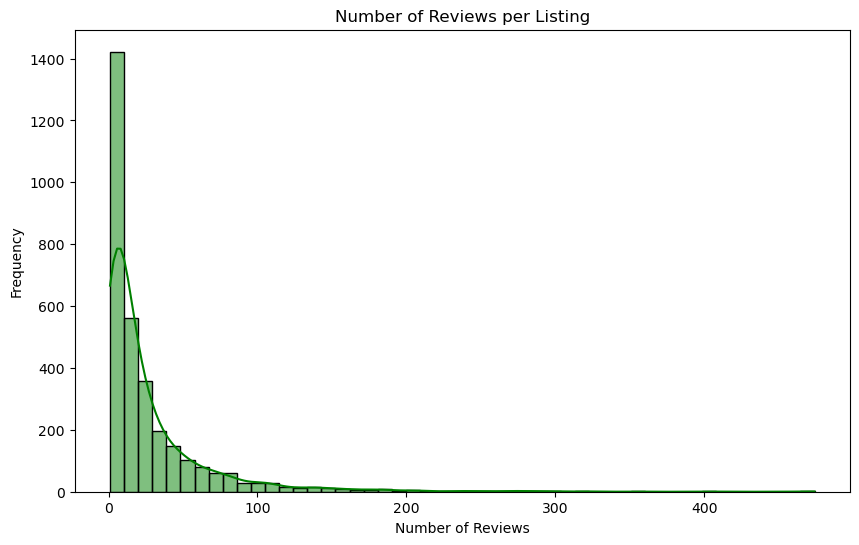

In [20]:
# 7. Number of Reviews per Listing
reviews_per_listing = reviews.groupby('listing_id').size()
plt.figure(figsize=(10, 6))
sns.histplot(reviews_per_listing, bins=50, kde=True, color='green')
plt.title('Number of Reviews per Listing')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()


#### Review Scores Distribution: Displays the distribution of review scores.

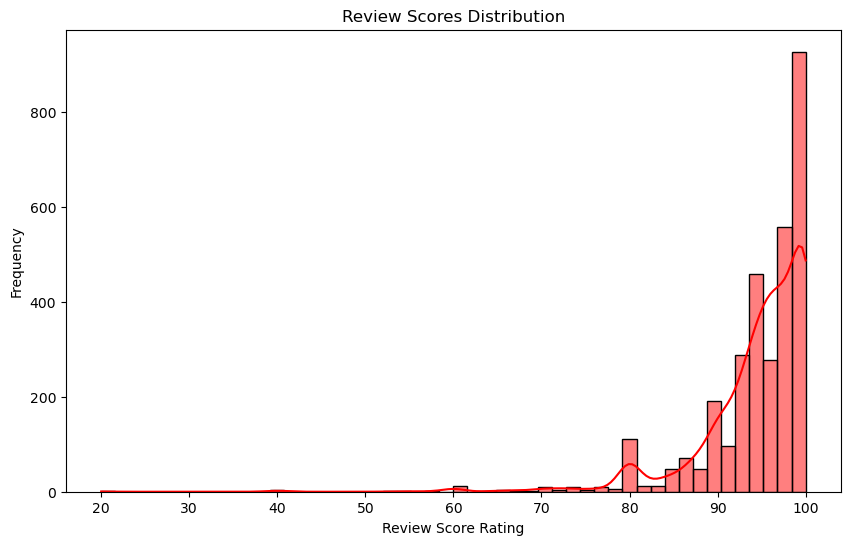

In [21]:
# 8. Review Scores Distribution
if 'review_scores_rating' in listings.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(listings['review_scores_rating'].dropna(), bins=50, kde=True, color='red')
    plt.title('Review Scores Distribution')
    plt.xlabel('Review Score Rating')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Review scores rating column not found in listings data.")

# Analyse, Model, and Visualize

## 1. Busiest times of the year for Airbnb bookings in Seattle

C:\Users\molem003\AppData\Local\Temp\ipykernel_24596\296939654.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=busiest_months.index, y=busiest_months.values, palette='viridis')


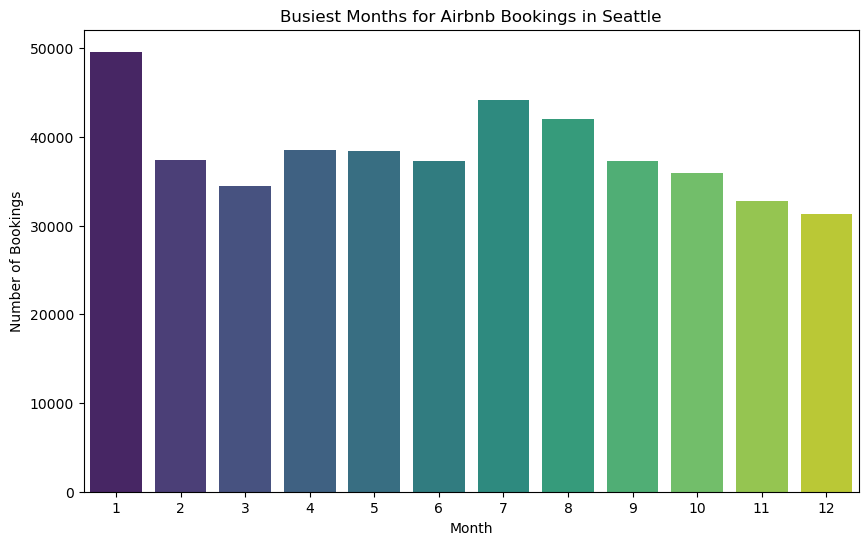

In [22]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['month'] = calendar['date'].dt.month
busiest_months = calendar[calendar['available'] == 'f'].groupby('month').size()

plt.figure(figsize=(10, 6))
sns.barplot(x=busiest_months.index, y=busiest_months.values, palette='viridis')
plt.title('Busiest Months for Airbnb Bookings in Seattle')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

## 2. Trend in the number of new listings

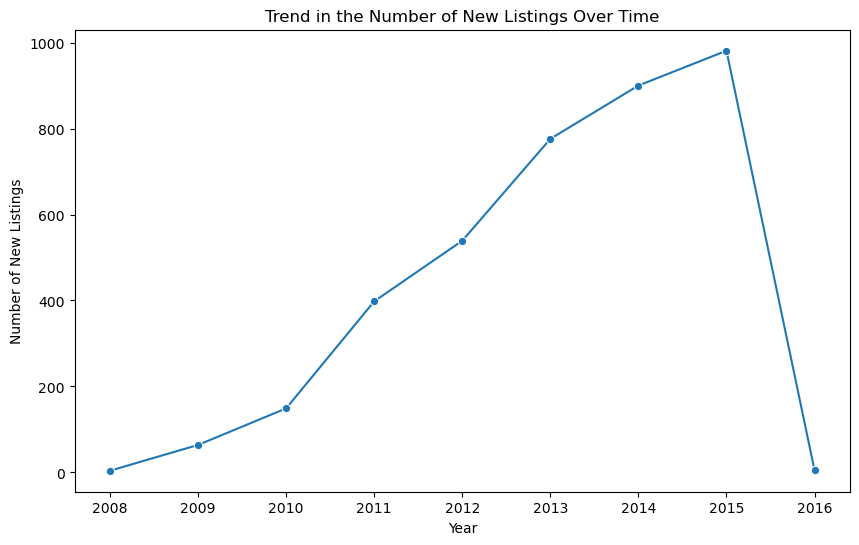

In [23]:

listings['host_since'] = pd.to_datetime(listings['host_since'])
listings['year'] = listings['host_since'].dt.year
new_listings_trend = listings.groupby('year').size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=new_listings_trend.index, y=new_listings_trend.values, marker='o')
plt.title('Trend in the Number of New Listings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of New Listings')
plt.show()

## 3. Customer reviews across different neighbourhoods in Seattle

C:\Users\molem003\AppData\Local\Temp\ipykernel_24596\474109216.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighborhood_review_counts.values, y=neighborhood_review_counts.index, palette='viridis')


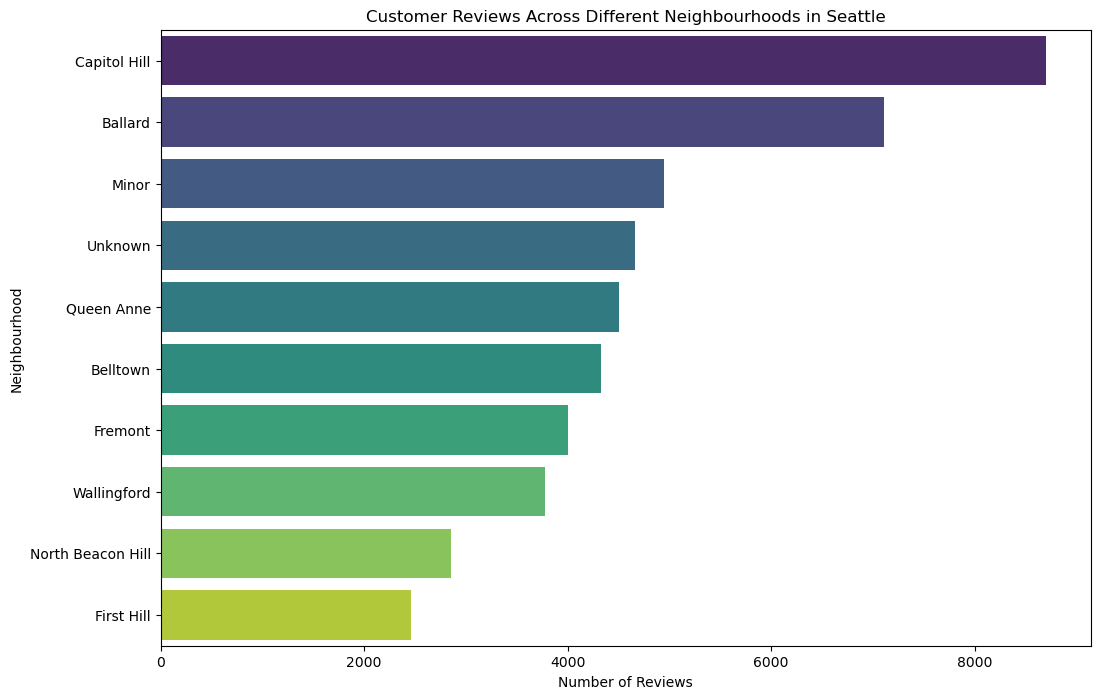

In [24]:
neighborhood_reviews = reviews.merge(listings[['id', 'neighbourhood']], left_on='listing_id', right_on='id')
neighborhood_review_counts = neighborhood_reviews.groupby('neighbourhood').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=neighborhood_review_counts.values, y=neighborhood_review_counts.index, palette='viridis')
plt.title('Customer Reviews Across Different Neighbourhoods in Seattle')
plt.xlabel('Number of Reviews')
plt.ylabel('Neighbourhood')
plt.show()

C:\Users\molem003\AppData\Local\Temp\ipykernel_24596\3524482628.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_scores_rating', y='neighbourhood_cleansed', data=top30_average_ratings, palette='viridis')


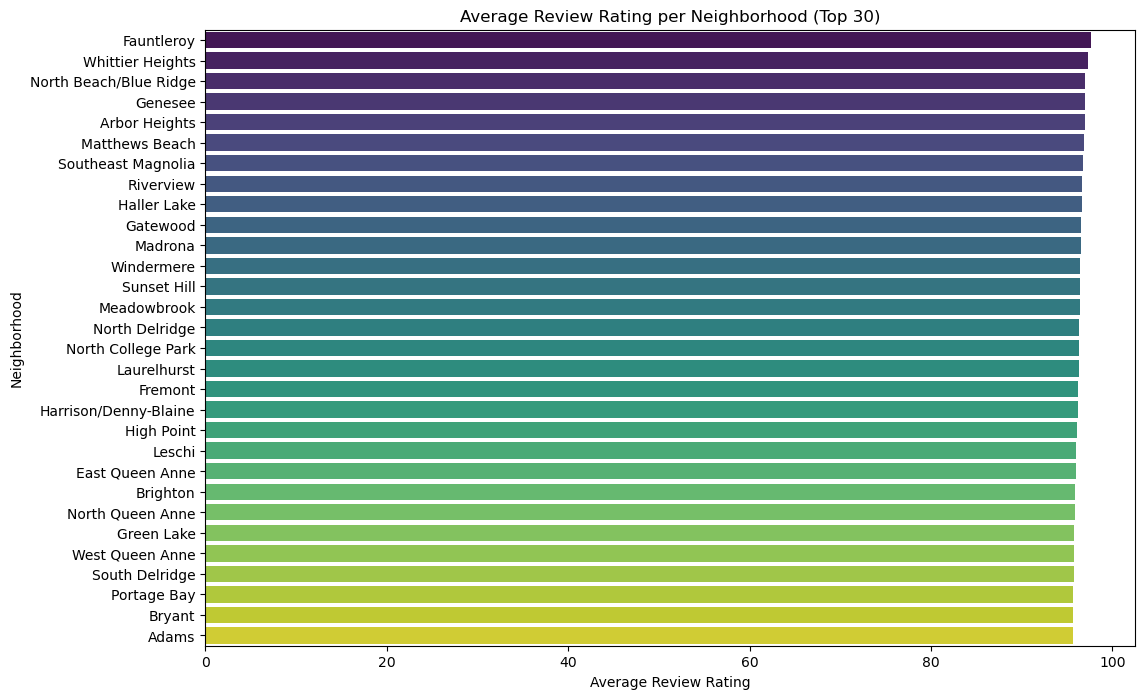

In [31]:
# Merge the listings and reviews datasets on listing_id
merged_data = reviews.merge(listings[['id', 'neighbourhood_cleansed', 'review_scores_rating']], left_on='listing_id', right_on='id')

# Calculate the average review rating per neighborhood
average_ratings = merged_data.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().reset_index()

# Sort the average ratings in descending order and get the top 30 neighborhoods
top30_average_ratings = average_ratings.sort_values(by='review_scores_rating', ascending=False).head(30)

# Plot the average review rating per neighborhood for the top 30 neighborhoods
plt.figure(figsize=(12, 8))
sns.barplot(x='review_scores_rating', y='neighbourhood_cleansed', data=top30_average_ratings, palette='viridis')
plt.title('Average Review Rating per Neighborhood (Top 30)')
plt.xlabel('Average Review Rating')
plt.ylabel('Neighborhood')
plt.show()

C:\Users\molem003\AppData\Local\Temp\ipykernel_24596\1420628486.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_scores_rating', y='neighbourhood_cleansed', data=bottom30_average_ratings, palette='viridis')


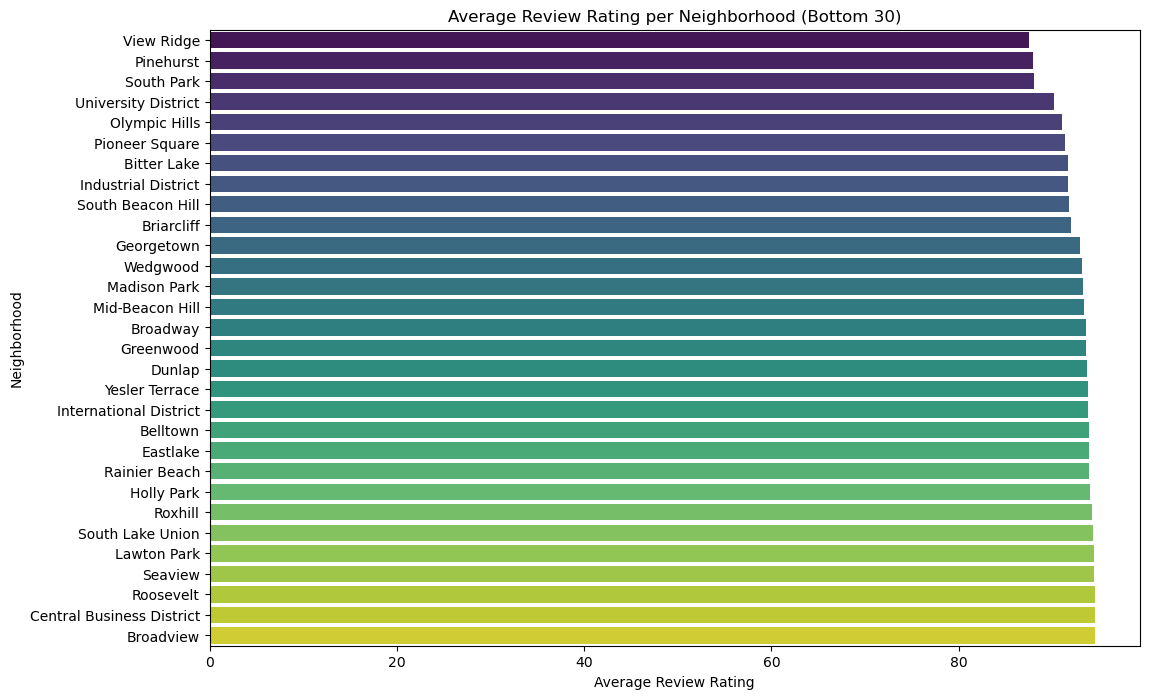

In [32]:
# Calculate the average review rating per neighborhood
average_ratings = merged_data.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().reset_index()

# Sort the average ratings in ascending order and get the bottom 30 neighborhoods
bottom30_average_ratings = average_ratings.sort_values(by='review_scores_rating', ascending=True).head(30)

# Plot the average review rating per neighborhood for the bottom 30 neighborhoods
plt.figure(figsize=(12, 8))
sns.barplot(x='review_scores_rating', y='neighbourhood_cleansed', data=bottom30_average_ratings, palette='viridis')
plt.title('Average Review Rating per Neighborhood (Bottom 30)')
plt.xlabel('Average Review Rating')
plt.ylabel('Neighborhood')
plt.show()

# Top 30 Average Price by Neighborhood

C:\Users\molem003\AppData\Local\Temp\ipykernel_24596\3716884601.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_neighborhood.values, y=avg_price_neighborhood.index, palette='viridis')


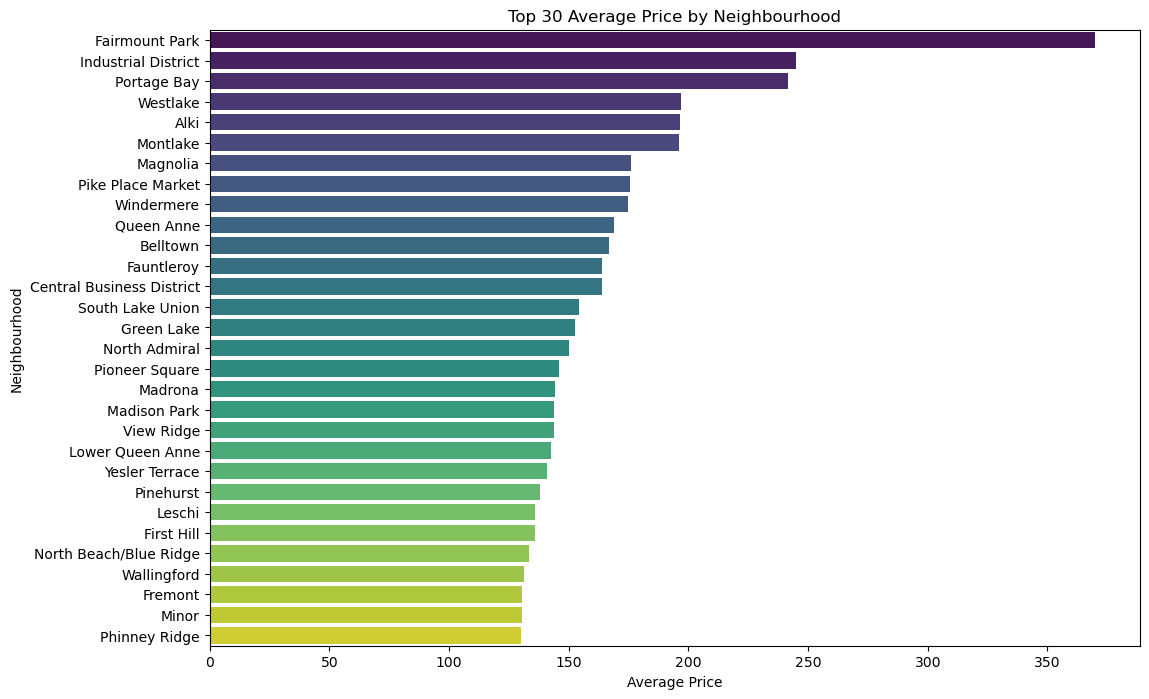

In [25]:
# Calculate average price by neighborhood
avg_price_neighborhood = listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(30)

# Plot the top 30 average price by neighborhood
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_price_neighborhood.values, y=avg_price_neighborhood.index, palette='viridis')
plt.title('Top 30 Average Price by Neighbourhood')
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood')
plt.show()

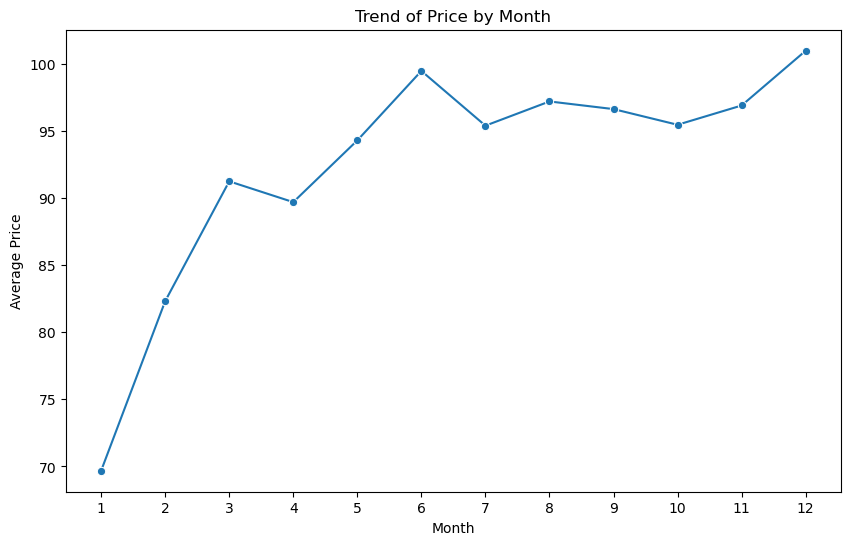

In [26]:
# Extract month from date
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['month'] = calendar['date'].dt.month

# Calculate average price by month
avg_price_by_month = calendar.groupby('month')['price'].mean()

# Plot the trend of price by month
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_price_by_month.index, y=avg_price_by_month.values, marker='o')
plt.title('Trend of Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13))
plt.show()

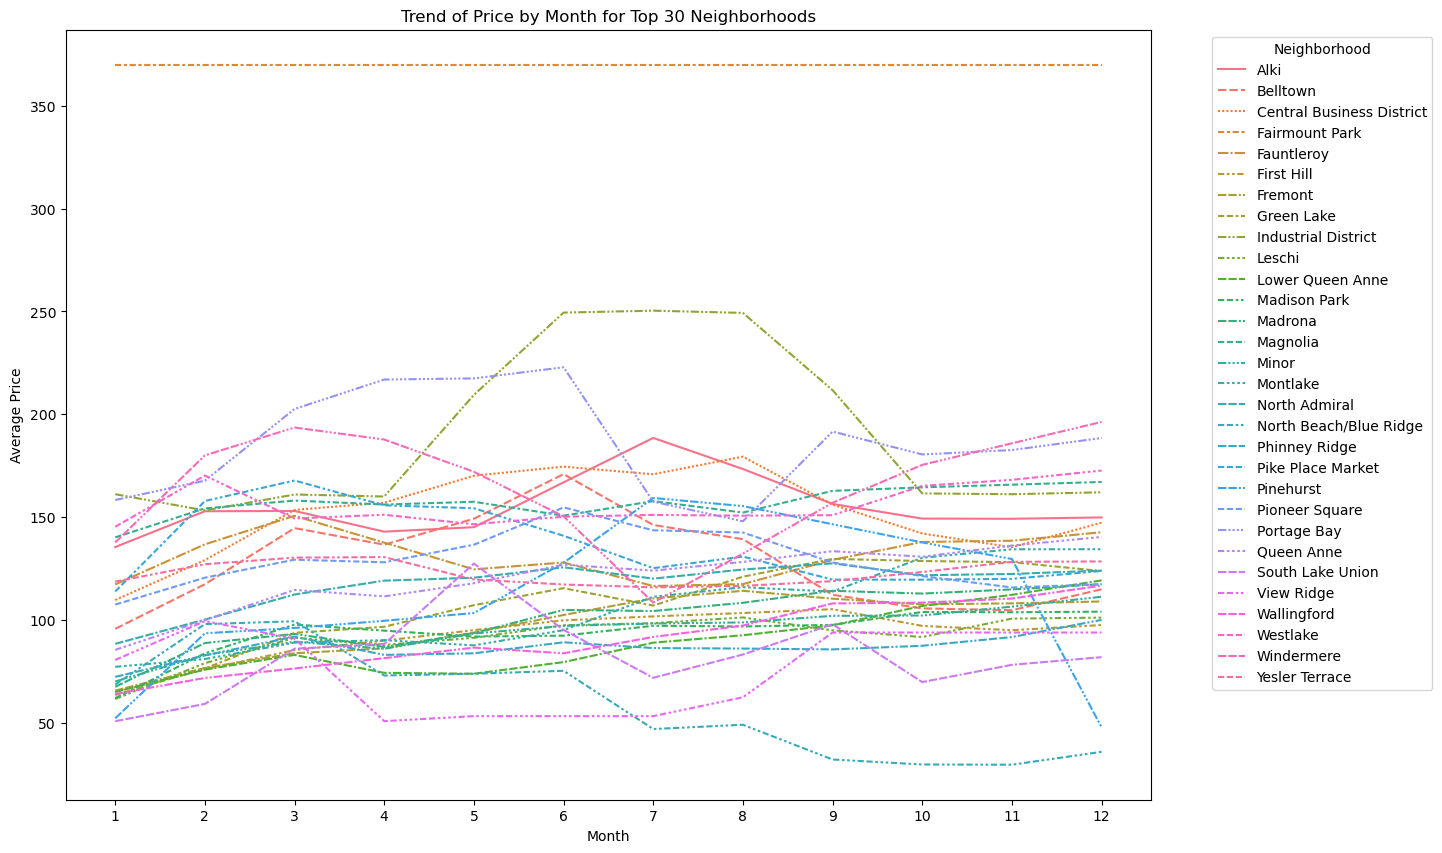

In [27]:
# Calculate average price by neighborhood and select top 30 neighborhoods
avg_price_neighborhood = listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(30)

# Filter calendar data for top 30 neighborhoods
top_neighborhoods = avg_price_neighborhood.index
listings_top_neighborhoods = listings[listings['neighbourhood'].isin(top_neighborhoods)]
calendar_top_neighborhoods = calendar[calendar['listing_id'].isin(listings_top_neighborhoods['id'])]

# Merge listings and calendar data on listing_id for top 30 neighborhoods
merged_data_top_neighborhoods = calendar_top_neighborhoods.merge(listings_top_neighborhoods[['id', 'neighbourhood']], left_on='listing_id', right_on='id')

# Extract month from date
merged_data_top_neighborhoods['date'] = pd.to_datetime(merged_data_top_neighborhoods['date'])
merged_data_top_neighborhoods['month'] = merged_data_top_neighborhoods['date'].dt.month

# Calculate average price by month for top 30 neighborhoods
avg_price_by_month_top_neighborhoods = merged_data_top_neighborhoods.groupby(['month', 'neighbourhood'])['price'].mean().unstack()

# Plot the trend of price by month for top 30 neighborhoods
plt.figure(figsize=(14, 10))
sns.lineplot(data=avg_price_by_month_top_neighborhoods)
plt.title('Trend of Price by Month for Top 30 Neighborhoods')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(1, 13))
plt.show()

# Conclusions from the Analysis

**1.	What are the busiest times of the year for Airbnb bookings in Seattle?**
 
We observe that January, July, and August are particularly busy months for Airbnb bookings in Seattle. This trend can be attributed to several factors. January sees a surge in bookings due to New Year's celebrations, as people look to start the year with a memorable trip. July is bustling with activity, largely because of Independence Day festivities, which draw both locals and tourists to the city for various events and celebrations. Additionally, August is a popular month as it marks the end of summer. Many people take advantage of the warm weather to enjoy outdoor activities and vacations before the colder winter months set in. This combination of holiday celebrations and seasonal preferences makes these months peak times for Airbnb bookings in Seattle.

**2.	How do customer reviews vary across different neighbourhoods in Seattle?**
 
 
Examining the average review ratings for both the top 30 and bottom-rated neighbourhoods reveals that Seattle maintains a remarkably high standard in hosting Airbnb’s. The overall average rating across the city exceeds 80%, which is a testament to the quality of service provided by hosts. In particular, the top-rated neighbourhoods boast impressive average ratings around 90%, indicating that guests are consistently satisfied with their experiences in these areas.
This high level of guest satisfaction can be attributed to several factors. Firstly, hosts in Seattle appear to be highly attentive to the needs and preferences of their guests, ensuring that their properties are well-maintained and equipped with necessary amenities. Additionally, the city's vibrant culture and diverse attractions likely contribute to the positive experiences of visitors.
Even the neighbourhoods with lower average ratings still maintain a commendable standard, reflecting the overall commitment of Seattle's Airbnb hosts to provide excellent hospitality. This consistency in quality across different neighbourhoods highlights Seattle as a prime destination for travellers seeking reliable and enjoyable accommodations.

**3.	How does pricing fluctuate across the top 30 neighbourhoods during this time period?**

 
Considering this is data for 2016 we can see that Fairmount Park was one of the more expensive neighbourhoods for Airbnb listings in Seattle. The average cost for an Airbnb in Fairmount Park was notably higher compared to other neighbourhoods, that trend has since normalised. 
 
However, we observe that pricing remains consistent during the busy months for Seattle Airbnb bookings. There is a slight peak in prices just before the busiest period, likely as a strategy to encourage more bookings by creating a sense of urgency among potential guests. This slight increase helps hosts capitalize on the upcoming high demand while still attracting early bookers.
Interestingly, once the peak period begins, the pricing stabilizes and remains steady through to the end of the year. This consistency in pricing suggests that hosts prefer to maintain a balanced approach, ensuring that their listings remain attractive to guests throughout the busy months. By avoiding significant price hikes during peak times, hosts can potentially secure more consistent bookings and foster positive guest experiences, which can lead to better reviews and repeat customers.
